<a href="https://colab.research.google.com/github/gabrielmprata/Anatel_Reclamacoes/blob/main/Anatel_Pesquisa_Qualidade_PreProc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img loading="lazy" src="https://cdn.jsdelivr.net/gh/devicons/devicon@latest/icons/python/python-original.svg" width="40" height="40"/> <img src="https://cdn.jsdelivr.net/gh/devicons/devicon@latest/icons/pandas/pandas-original-wordmark.svg" width="40" height="40"/>   <img loading="lazy" src="https://cdn.jsdelivr.net/gh/devicons/devicon@latest/icons/plotly/plotly-original-wordmark.svg" width="40" height="40"/>

---
**Pré Processamento de dados**
>
**Dev**: Gabriel Prata
>
**Data**: 03/09/2024
>
**Última modificação**: 17/09/2024
>
**Contexto**: *Anatel - Pesquisa de Satisfação e Qualidade*
>
---

![Badge em Desenvolvimento](http://img.shields.io/static/v1?label=STATUS&message=Desenvolvimento&color=FFF666&style=for-the-badge)

#**<font color=#FFF666 size="6"> Import libraries**

In [21]:
# Importação de pacotes
import pandas as pd
import numpy as np
import missingno as ms # para tratamento de missings
import datetime
import re # expressão regulares

#bibliotecas para visualização de dados
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

#**<font color=#fff666 size="6"> 1. Objetivo**

Esse Notebook, foca na etapa de pré-processamento de dados.
>
Esta é a etapa mais demorada e trabalhosa do projeto de ciência de dados, e estima-se que consuma pelo menos 70% do tempo total do projeto.
>
Ao final desse notebook, entregaremos um arquivo mais coeso para as criar a visualização de dados da pesquisa de satisfação e qualidade feita pela Anatel.

#**<font color=#fff666 size="6"> 2. Coleta de dados**

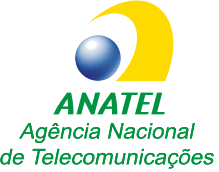
>
As informações da **Pesquisa de satisfção e qualidade**, estão no sítio de dados abertos da Anatel, no link abaixo:
>
https://dados.gov.br/dados/conjuntos-dados/pesquisas-de-satisfacao-e-qualidade-percebida
>

No link acima, é disponibilizado o arquivo *pesquisa de satisfacao.zip*, com 16 Mb.
>
Ao descompactar, é fornecido dois arquivos, e usaremos nesse projeto o arquivo:
>
*pesquisa_dados_consolidados.csv*

###**<font color=#fff666> 2.1 Importando arquivo**

In [22]:
url   = "https://raw.githubusercontent.com/gabrielmprata/Anatel_Reclamacoes/main/datasets/pesquisa_dados.csv.bz2"

df_pesquisa = pd.read_csv(url, encoding = "utf-8", sep=';')

In [23]:
# Valida carga
df_pesquisa.head(2)

,Serviço,Prestadora,Estado,Calculo,Questao,Indicador,Tema,Alternativas,Alternativas_Valor,Ano,Nota,Ranking,Grupo
0,Banda Larga Fixa,CLARO,AC,Média Ponderada,QCR1_1,Qualidade da Cobrança ou Recarga,Valores cobrados corretamente na conta,Valores cobrados corretamente na conta,NaN,2023,"8,2195121951",NaN,Indicadores
1,Banda Larga Fixa,Média Prestadoras,AC,Média Ponderada,QCR1_1,Qualidade da Cobrança ou Recarga,Valores cobrados corretamente na conta,Valores cobrados corretamente na conta,NaN,2023,"8,1725984793",NaN,Indicadores


#**<font color=#fff666 size="6"> 3. Análise de Dados Inicial**

###**<font color=#fff666> 3.1. Estatísticas Descritivas**

In [ ]:
#	Quantidade de atributos e instâncias (linhas/colunas)
df_pesquisa.shape

(531784, 13)

<font color=#fff666> Dataframe com 13 atributos(features) e 531.784 tuplas.

In [ ]:
# Exibir os 5 primeiros registros
df_pesquisa.head(5)

,Serviço,Prestadora,Estado,Calculo,Questao,Indicador,Tema,Alternativas,Alternativas_Valor,Ano,Nota,Ranking,Grupo
0,Banda Larga Fixa,CLARO,AC,Média Ponderada,QCR1_1,Qualidade da Cobrança ou Recarga,Valores cobrados corretamente na conta,Valores cobrados corretamente na conta,NaN,2023,"8,2195121951",NaN,Indicadores
1,Banda Larga Fixa,Média Prestadoras,AC,Média Ponderada,QCR1_1,Qualidade da Cobrança ou Recarga,Valores cobrados corretamente na conta,Valores cobrados corretamente na conta,NaN,2023,"8,1725984793",NaN,Indicadores
2,Banda Larga Fixa,OI,AC,Média Ponderada,QCR1_1,Qualidade da Cobrança ou Recarga,Valores cobrados corretamente na conta,Valores cobrados corretamente na conta,NaN,2023,"8,1569767442",NaN,Indicadores
3,Banda Larga Fixa,CLARO,AC,Média Índices,QCR,Qualidade da Cobrança ou Recarga,Qualidade da Cobrança ou Recarga,Média Indicadores,NaN,2023,"8,1148859065",NaN,Indicadores
4,Banda Larga Fixa,Média Prestadoras,AC,Média Índices,QCR,Qualidade da Cobrança ou Recarga,Qualidade da Cobrança ou Recarga,Média Indicadores,NaN,2023,"8,093513764299999",NaN,Indicadores


In [24]:
# Mostra diversas informações do Dataframe em um único comando, e exibir o uso de memória
df_pesquisa.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531784 entries, 0 to 531783
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Serviço             531784 non-null  object 
 1   Prestadora          531784 non-null  object 
 2   Estado              531784 non-null  object 
 3   Calculo             531784 non-null  object 
 4   Questao             531784 non-null  object 
 5   Indicador           531784 non-null  object 
 6   Tema                531784 non-null  object 
 7   Alternativas        531784 non-null  object 
 8   Alternativas_Valor  482102 non-null  float64
 9   Ano                 531784 non-null  int64  
 10  Nota                531784 non-null  object 
 11  Ranking             1361 non-null    object 
 12  Grupo               531784 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 412.5 MB


O atributo **nota**, foi carregado como OBJECT, por que no CSV o campo estava no padrão BR, com vírgula, e não com ponto, padrão US.
>
Para resolver essa questão de formatação, vou substituir a virgula por ponto e depois converter para FLOAT.

In [25]:
df_pesquisa['Nota'] = (df_pesquisa['Nota'].str.replace(',','.').astype(float)).round(2)



---



In [ ]:
# Quantidade de valores únicos
df_pesquisa.nunique()

,0
Serviço,5
Prestadora,19
Estado,28
Calculo,3
Questao,91
Indicador,6
Tema,59
Alternativas,142
Alternativas_Valor,27
Ano,3


In [ ]:
# Quantidade de NaN/Missing/Nulls no dataframe
df_pesquisa.isnull().sum()

,0
Serviço,0
Prestadora,0
Estado,0
Calculo,0
Questao,0
Indicador,0
Tema,0
Alternativas,0
Alternativas_Valor,49682
Ano,0


###**<font color=#fff666> 3.2. Distribuição dos atributos**

In [ ]:
df_pesquisa.Indicador.value_counts() #quantidade

,count
Indicador,
Satisfação Geral,201295
Qualidade do Funcionamento,101844
Qualidade do Atendimento Digital,69982
Qualidade do Atendimento Telefônico,68703
Qualidade da Cobrança ou Recarga,48492
Qualidade da Informação ao Consumidor,41468


In [ ]:
df_pesquisa.Tema.value_counts() #quantidade

,count
Tema,
Rapidez para conseguir o que precisava,45205
Satisfação Geral,23980
Intenção de continuar cliente,23414
Recomendação do serviço,23085
Facilidade de conseguir o que precisava,22783
Clareza das informações (atendimento digital),22552
Facilidade de conseguir o que precisou (atendimento telefônico),22441
Clareza das informações (atendimento telefônico),21904
Clareza das regras do contrato,18956


In [ ]:
df_pesquisa.Alternativas.value_counts() #quantidade

,count
Alternativas,
Nota 8,33176
Nota 9,33161
Nota 7,33141
Nota 5,33091
Nota 6,32937
...,...
20 Pessoas,39
14 Pessoas,36
15 Pessoas,19


#**<font color=#fff666 size="6"> 4. Pré-Processamento de dados**

Após coletar e analisar os dados na etapa anterior, agora é o momento
de limpar, transformar e apresentar melhor os dados.
>
Assim poderemos obter, na próxima etapa, os melhores resultados possíveis nos algoritmos de
Machine Learning, ou simplesmente apresentar dados mais confiáveis para os clientes em soluções de
business intelligence.


---

###**<font color=#fff666> 4.1. Limpeza**

####**<font color=#fff666> 4.1.1 Padronização de dados**

Dentro da programação, possuímos alguns padrões de escrita para nomes de variáveis, funções, classes e assim por diante.
>
Esses padrões de escrita são chamados de estilos de case.
>
Existem diversos tipos de case, nesse projeto iremos utilizar:
>
**Snake Case (snake_case)**: Nesse estilo, todas as letras são minúsculas e as palavras são separadas por um underscore(_).

In [26]:
# Criar uma função para aplicar o snake_case
def snake_case(string):
    string = re.sub(" +", " ", string)   # substitui múltiplos espaços por um espaço
    string = re.sub(" ", "_", string)    # substitui espaço por _
    return string.lower() # transforma em minuscula

df_pesquisa.columns = [snake_case(column) for column in df_pesquisa.columns]
df_pesquisa.columns

Index(['serviço', 'prestadora', 'estado', 'calculo', 'questao', 'indicador',
       'tema', 'alternativas', 'alternativas_valor', 'ano', 'nota', 'ranking',
       'grupo'],
      dtype='object')

In [27]:
#renomear colunas
df_pesquisa = df_pesquisa.rename(columns={'serviço': 'servico'})

In [28]:
df_pesquisa.columns

Index(['servico', 'prestadora', 'estado', 'calculo', 'questao', 'indicador',
       'tema', 'alternativas', 'alternativas_valor', 'ano', 'nota', 'ranking',
       'grupo'],
      dtype='object')

#**<font color=#fff666 size="6"> 5. Export**

In [29]:
# Exportar apenas as pesquisas de Banda Larga Fixa
df_pesquisa_exp = df_pesquisa[(df_pesquisa['servico'] == 'Banda Larga Fixa')].copy()

In [30]:
from shutil import copyfileobj
import bz2

# Exportar para csv
df_pesquisa_exp.to_csv('df_pesquisa.csv', index=False)

# compactar arquivo com nivel de compressão máxima
with open('df_pesquisa.csv', 'rb') as input:
    with bz2.BZ2File('df_pesquisa.csv.bz2', 'wb', compresslevel=9) as output:
        copyfileobj(input, output)